Q7. Write a function my_interp_plotter(x, y, X, option) where x and y are arrays containing
experimental data points, and X is an array that contains the coordinates for which an interpolation
is desired. The input argument option should be a string, either **“linear,” “spline,” or “nearest.”**
Your function should produce a plot of the data points (x, y) marked as red circles. The points
(X, Y ), where X is the input and Y is the interpolation at the points contained in X defined by the
input argument specified by option. The points (X, Y ) should be connected by a blue line. Be sure
to include the title, axis labels, and a legend. Hint: You should use interp1d from SciPy, and
checkout the kind option.

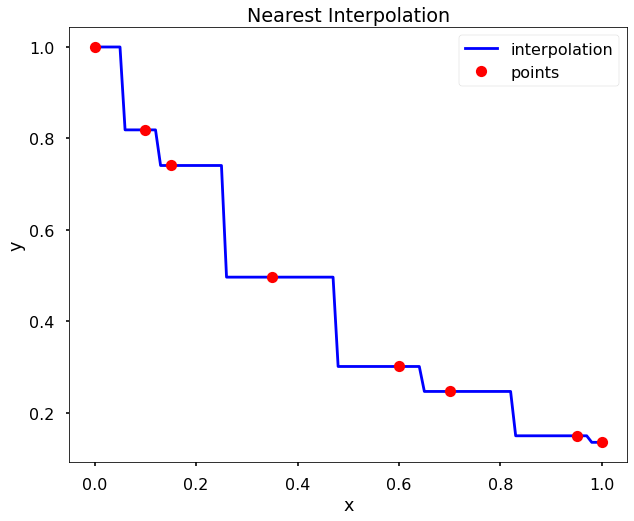

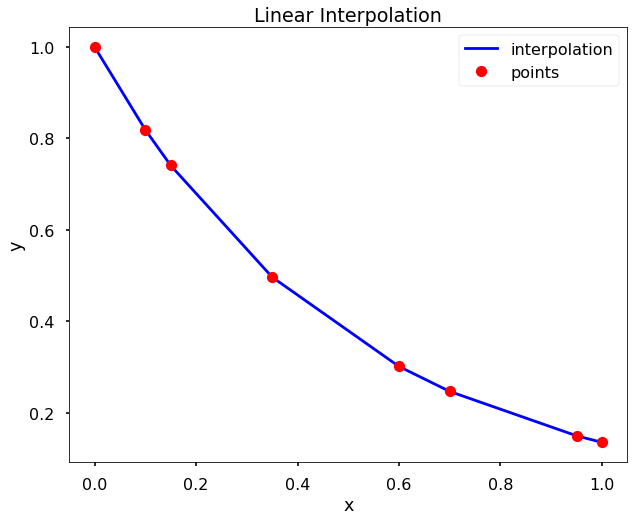

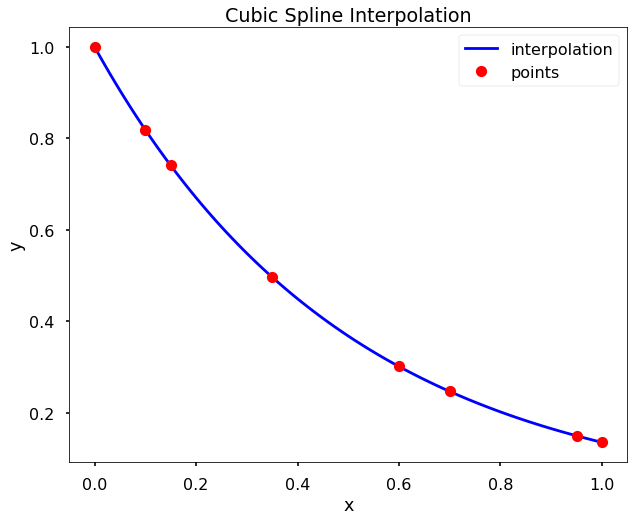

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
plt.style.use("seaborn-poster")
def my_interp_plotter(x, y, X, option):
    plt.figure(figsize = (10,8))
    if option=="linear":
        f = interp1d(x, y)
        Y = f(X)
        plt.plot(X, Y,"b",x, y, "ro")
        plt.title("Linear Interpolation")
    elif option=="spline":
        f = interp1d(x, y, kind='cubic')
        Y = f(X)
        plt.plot(X, Y, "b",x, y, "ro")
        plt.title("Cubic Spline Interpolation")
    elif option=="nearest":
        f = interp1d(x, y, kind='nearest')
        Y = f(X)
        plt.plot(X, Y, "b",x, y, "ro")
        plt.title("Nearest Interpolation")
    else:   
        print("system disorder")
    plt.legend(['interpolation','points'])    
    plt.xlabel("x")
    plt.ylabel("y")
    plt.show()
    return None
x = np.array([0, .1, .15, .35, .6, .7, .95, 1])
y=np.array([1,0.8187,0.7408,0.4966,0.3012,0.2466,0.1496,0.1353])
X = np.linspace(0, 1, 101)
my_interp_plotter(x, y, X, "nearest")
my_interp_plotter(x, y, X, "linear" )        
my_interp_plotter(x, y, X, "spline" )

Q8. Write a function my_D_cubic_spline(x, y, X, D), where the output Y is the **cubic spline interpolation** at X taken from the data points contained in x and y. Instead of the standard pinned endpoint conditions (i.e., ${S"}_1 (x_1) = 0$ and ${S"}_{n−1}(x_n) = 0$), use the endpoint conditions $S'_1(x_1) = D$ and $S'_{n−1}(x_n) = D$ (i.e., the slopes of the interpolating polynomials at the endpoints are $D$).

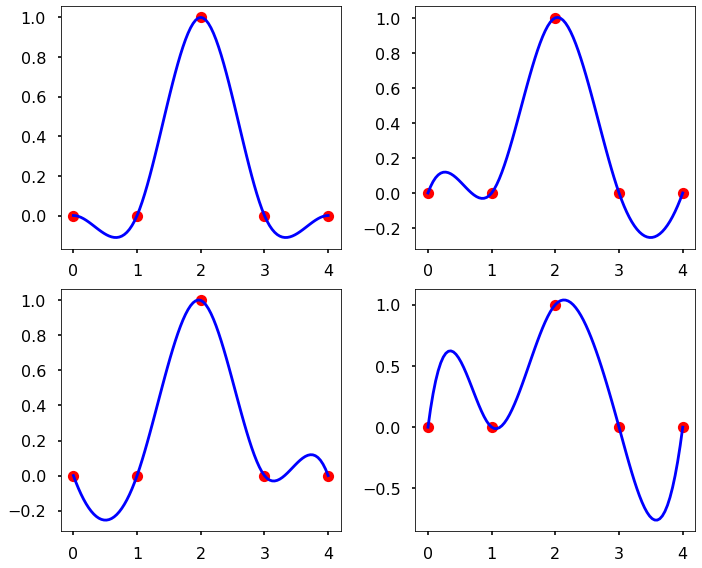

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

plt.style.use("seaborn-poster")
x = [0, 1, 2, 3, 4]
y = [0, 0, 1, 0, 0]
X = np.linspace(0, 4, 101)
def my_D_cubic_spline(x, y, X, D):
    f = CubicSpline(x, y, bc_type=((1, D), (1, D)))
    return f(X)
Y = my_D_cubic_spline(x, y, 1.5, 1)
plt.figure(figsize = (10, 8))
plt.subplot(221)
plt.plot(x, y, "ro", X, my_D_cubic_spline(x, y, X, 0), "b")
plt.subplot(222)
plt.plot(x, y, "ro", X, my_D_cubic_spline(x, y, X, 1), "b")
plt.subplot(223)
plt.plot(x, y, "ro", X, my_D_cubic_spline(x, y, X, -1), "b")
plt.subplot(224)
plt.plot(x, y, "ro", X, my_D_cubic_spline(x, y, X, 4), "b")
plt.tight_layout()
plt.show()

Q9. Write a function my_lagrange(x, y, X) where the output Y is the **Lagrange interpolation** of the data points contained in x and y computed at X.

Hint: Use a nested for-loop, where the inner for-loop computes the product for the Lagrange basis polynomial and the outer loop computes the sum for the Lagrange polynomial. Don’t use the existing lagrange function from SciPy.

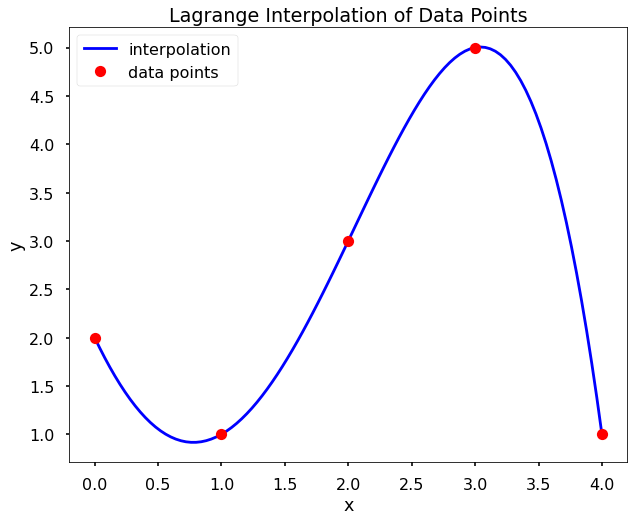

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn-poster")

def my_lagrange(x, y, X):
    n = len(x)
    Y=0
    for i in range(n):
        p = 1
        for j in range(n):
            if i != j:
                p = p * (X - x[j])/(x[i] - x[j])
        Y = Y + p * y[i]
    return Y 

x = [0, 1, 2, 3, 4]
y = [2, 1, 3, 5, 1]
X = np.linspace(0, 4, 101)
plt.figure(figsize = (10,8 ))
plt.plot(X, my_lagrange(x, y, X), "b", label = "interpolation")
plt.plot(x, y, "ro", label = "data points")
plt.xlabel("x")
plt.ylabel("y")
plt.title(f"Lagrange Interpolation of Data Points")
plt.legend()
plt.show()

Q10. Fit the data x = [0, 1, 2, 3, 4], y = [2, 1, 3, 5, 1] using **Newton’s polynomial interpolation.**

In [3]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn-poster")
%matplotlib inline

def divided_diff(x, y):
    n = len(y)
    coef = np.zeros([n, n])
    coef[:,0] = y
    for j in range(1,n):
        for i in range(n-j):
            coef[i][j] = (coef[i+1][j-1]-coef[i][j-1])/(x[i+j]-x[i])
    return coef

def newton_poly(coef, x_data, x):
    n = len(x_data) - 1
    p = coef[n]
    for k in range(1,n+1):
        p = coef[n-k] + (x -x_data[n-k])*p
    return p

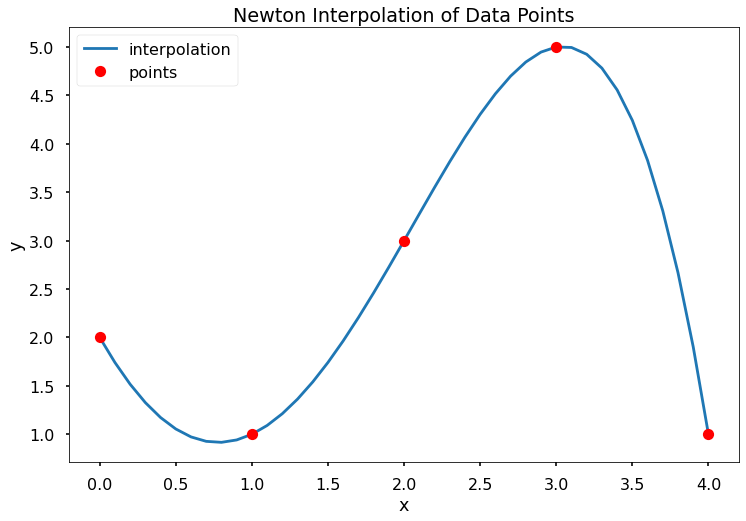

In [10]:
x = np.array([0, 1, 2, 3, 4])
y = np.array([2, 1, 3, 5, 1])
# get the divided difference coef
a_s = divided_diff(x, y)[0, :]
# evaluate on new data points
x_new = np.arange(0, 4.1, .1)
y_new = newton_poly(a_s, x, x_new)
plt.figure(figsize = (12, 8))
plt.plot(x_new, y_new,x, y, "ro")
plt.xlabel("x")
plt.ylabel("y")
plt.title(f"Newton Interpolation of Data Points")
plt.legend(['interpolation','points'])
plt.show()